In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
raw_data = pd.read_csv("../datasets/ProductDetail2.csv")

In [16]:
product_id = raw_data["Filename"].str.replace(".csv", "")
raw_name = raw_data["Name"].str.split(" ").str[0]
names = {'Name': raw_name}
unclean_brand_name = pd.DataFrame(names)
unclean_brand_name['Name'] = unclean_brand_name['Name'].apply(lambda x: x.lower())
unclean_brand_name['Name'] = unclean_brand_name['Name'].apply(lambda x: x.capitalize())
brand_name = unclean_brand_name['Name']
model_name = raw_data["Name"].str.split(" ").str[1] + " " + raw_data["Name"].str.split(" ").str[2]
structured_data = pd.DataFrame(list(zip(product_id, brand_name, model_name)), columns=["Product ID", "Brand", "Model"])

In [17]:
brand_count = brand_name.value_counts()
brand_count

Name
Dell          324
Asus          318
Acer          316
Lenovo        238
Hp            166
Msi            78
Laptop         37
Apple          26
Avita           9
Microsoft       5
Mi              5
Modern          5
Honor           4
Aspire          4
Dynabook        3
Gp76            3
Gp66            3
Ryzen           3
Xlab            3
Macbook         3
Gateway         3
Chuwi           3
Gf63            2
Razer           2
Nova            2
Summit          2
Predator        1
Level51         1
Nitro           1
Gigabyte        1
Delta           1
Toshiba         1
Pavilion        1
Amd             1
2024            1
Vaio            1
I7              1
Great           1
Vostro          1
Newly           1
Creator         1
Chiwi           1
Expertbook      1
Dua             1
Huawei          1
Original        1
Name: count, dtype: int64

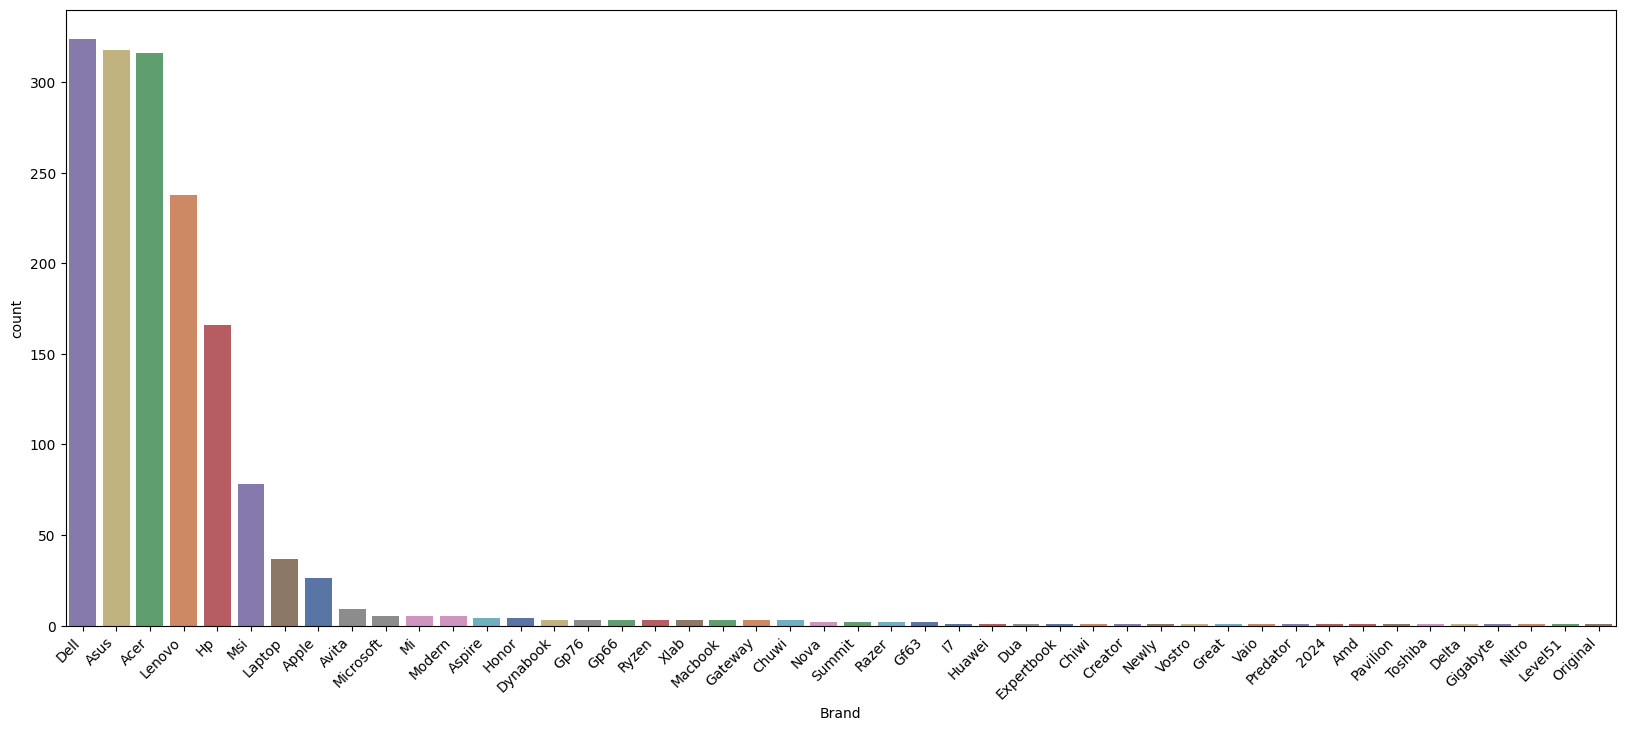

In [18]:
brand_count = brand_name.value_counts()
brand_order = brand_count.sort_values(ascending=False).index
plt.figure(figsize=(20, 8))
plt.xticks(rotation=45, ha='right')
brand_plot = sns.countplot(structured_data, x = "Brand", order=brand_order, hue="Brand", palette="deep")

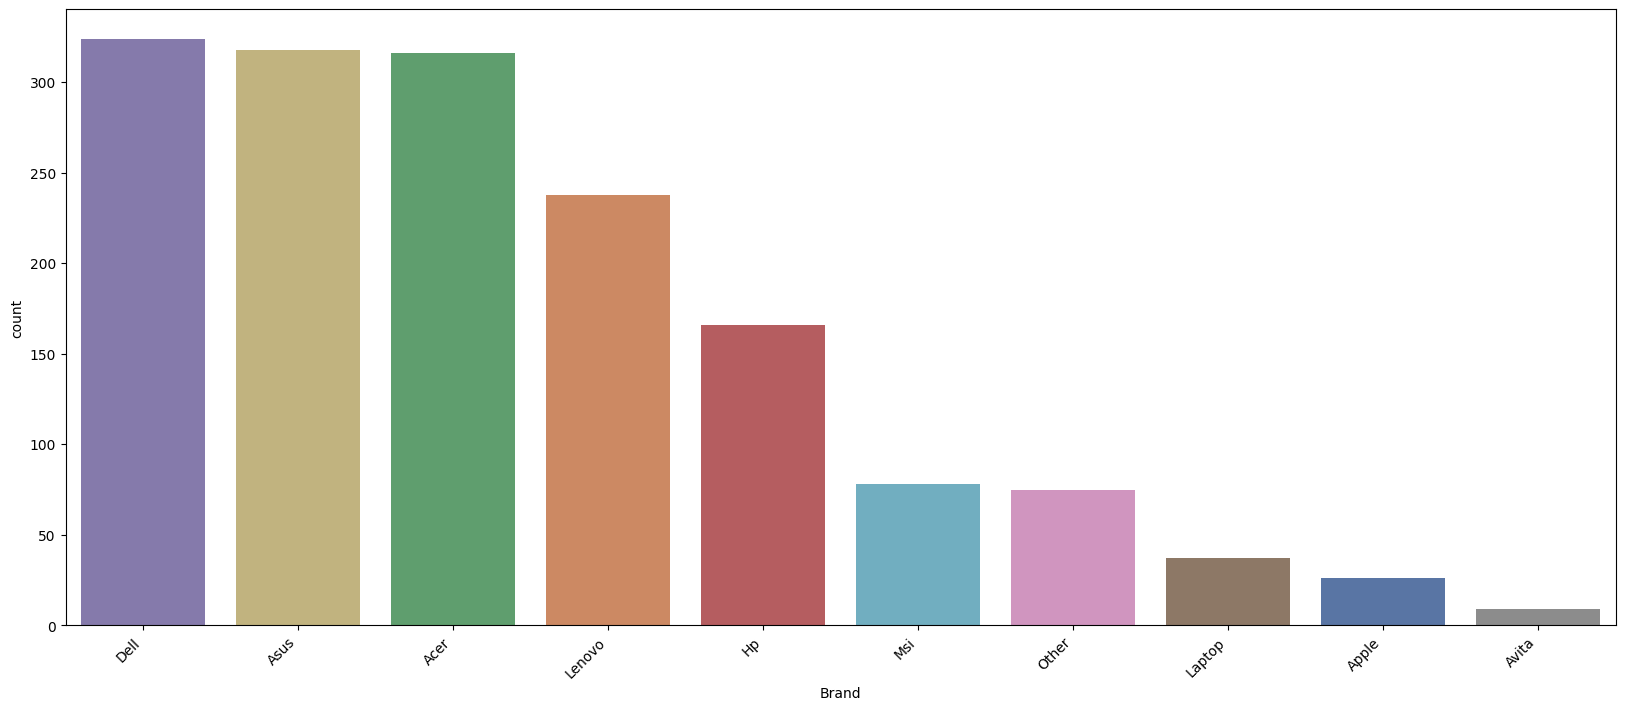

In [19]:
brand_count = brand_name.value_counts()
brand_to_merge = brand_count[brand_count.isin([1, 2, 3, 4, 5])].index
structured_data['Brand'] = structured_data['Brand'].apply(lambda x: 'Other' if x in brand_to_merge else x)
brand_after_merge = structured_data['Brand'].value_counts()
brand_after_merge_order = brand_after_merge.sort_values(ascending=False).index
plt.figure(figsize=(20, 8))
plt.xticks(rotation=45, ha='right')
brand_plot = sns.countplot(structured_data, x = "Brand", order=brand_after_merge_order, hue="Brand", palette="deep")